## Monte Carlo integration

An integration method for functions hard to get the analytical result.

### Related formulas

 $
 \begin{aligned}
 E[f(X)] &= \int{f(X)P_X(X)\ dX}\\
         &\approx \frac{1}{n}\sum_{i=0}^n f(x_i)
 \end{aligned}
 $
 
 $ Var(X) = E[(X-E[X]^2] = E[X^2]-E[X]^2 $
 
 special case for uniform distribution of samples:
 
 $ P_X(X) = \frac{1}{c} $
 
 $ \int_a^b{P_X(X)} = 1 $
 
 $ c = \frac{1}{b - a} $
 
 $
 \begin{aligned}
 E[f(X)] &= \int_a^b{f(X)P_X(X)\ dX}\\
         &\approx \frac{b - a}{n}\sum_{i=0}^n f(X_i)
 \end{aligned}
 $

In [6]:
import sympy
from sympy import *
import numpy as np

# Use MC to get result of integration of x^2 on (0, 3)

## Create the function
x= symbols('x')
f1 = x ** 2
interval = 3 - 0

analytical_int_f1 = integrate(f1)
ret1 = analytical_int_f1.subs(x, 3)
print('analytical result : ', ret1)

## Prepare uniform samples and stretch to dest region
uniform_samples = np.random.uniform(0, 1, 10000)
dest_samples = uniform_samples * 3

lambda_f1 = lambdify(x, f1 * interval, 'numpy')
ret_samples = lambda_f1(dest_samples)
ret2 = np.average(ret_samples)
print('mc result : ', ret2)

analytical result :  9
mc result :  8.959211126000982


## With importance sampling

By changing the formula a little bit, it could be rewrite as:

$
\begin{aligned}
E[f(x)] &= \int{f(x)p(x)dx}\\
        &= \int{(f(x) \frac{p(x)}{q(x)})\ q(x)dx}\\
        &\approx \frac{1}{n} \sum_i f(x_i) \frac{p(x_i)}{q(x_i)}
\end{aligned}
$

In [6]:
from sympy import *
import numpy as np

## Create the function
x = symbols('x')
f1 = x ** 2
lambda1_f1 = lambdify(x, f1, 'numpy')

pdf = x * 2 / 9 # Integrate to 1 on (0, 3)
lambda2_f1 = lambdify(x, f1 / pdf, 'numpy')

uniform_samples = np.random.uniform(0, 1, 1000)
power_samples = np.random.power(2, 1000)

# Get the integration on (0, 3)
ret1_samples = lambda1_f1(uniform_samples * 3)
ret1 = np.average(ret1_samples) * 3

ret2_samples = lambda2_f1(power_samples * 3)
ret2 = np.average(ret2_samples)

print('uniform distri : ', ret1)
print('power distri : ', ret2)

uniform distri :  8.75446315595295
power distri :  9.074928120183799


## The effect of importance sampling

By examining the variance changing, We'll see how importance is benefiting.
We'll also compare different the effect of different pdf.

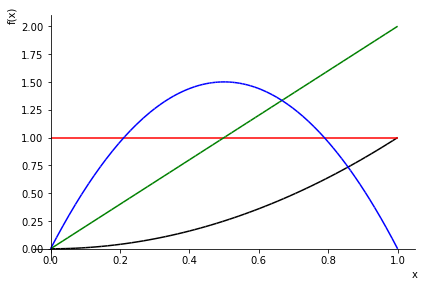

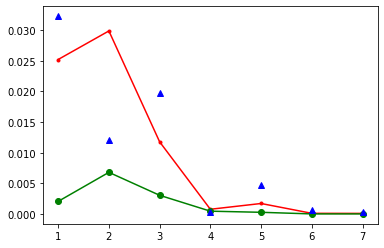

In [36]:
from sympy import *
from sympy.functions import exp
import numpy as np
import matplotlib.pyplot as plt
from sympy.plotting import plot

## Create the function
x = symbols('x')
f1 = x ** 2
lambda1_f1 = lambdify(x, f1, 'numpy')
normal_vars = []

# Power distribution
pdf1 = x * 2 # Integrate to 1 on (0, 1)
lambda2_f1 = lambdify(x, f1 / pdf1, 'numpy')
power_vars = []

# beta distribution with a = 2, b = 2
pdf2 = x * (1 - x) * 6
lambda3_f1 = lambdify(x, f1 / pdf2, 'numpy')
beta_vars = []

for i in range(1, 8):
    sample_cnt = 10 ** i
    uniform_samples = np.random.uniform(0, 1, sample_cnt)
    power_samples = np.random.power(2, sample_cnt)
    beta_samples = np.random.beta(2, 2, sample_cnt)

    # Get the integration on (0, 3)
    ret1_samples = lambda1_f1(uniform_samples)
    ret1 = np.average(ret1_samples)
    var1 = np.average(np.abs(ret1 - 1 / 3))
    normal_vars.append(var1)

    ret2_samples = lambda2_f1(power_samples)
    ret2 = np.average(ret2_samples)
    var2 = np.average(np.abs(ret2 - 1 / 3))
    power_vars.append(var2)

    ret3_samples = lambda3_f1(beta_samples)
    ret3 = np.average(ret3_samples)
    var3 = np.average(np.abs(ret3 - 1 / 3))
    beta_vars.append(var3)

    #print('ret1 : ', ret1, " var1 : ", var1)
    #print('ret2 : ', ret2, " var2 : ", var2)
    #print('ret3 : ', ret3, " var3 : ", var3)
    #print('')
    
p1 = plot(f1, (x, 0, 1), line_color='black', show=False)
p2 = plot(1, (x, 0, 1), line_color='red', show=False)
p3 = plot(pdf1, (x, 0, 1), line_color='green', show=False)
p4 = plot(pdf2, (x, 0, 1), line_color='blue', show=False)
p1.extend(p2)
p1.extend(p3)
p1.extend(p4)
p1.show()
x_coords = range(1, 8)
plt.plot(x_coords, normal_vars, 'r.-', x_coords, power_vars, 'go-', x_coords, beta_vars, 'b^')

 
## MIS

### Basic Approach

 1. Use multiple sampling techniques to do the sampling, use the weighted sum as the result.
 2. For complex integrand, you don't know which sampling technique is the best, MIS will perform much better than a bad match of sampling technique.
 3. Restriction 1: weight sum up to 1.
 4. Restriction 2: Weight equal to 0 where possibility is 0.
 
### Related formula

 $ E[f(x)] = \sum_{i=1}^n{\frac{1}{n_i} \sum_{j=1}^{n_i}{\omega_i}(x) \frac{f(x)}{p(x)}} $
 
### Strategies of weighting function

 1. Balance heuristic:
 
 $ \omega_i = \frac{n_i p(x_i)}{\sum_{i=1}^n{n_i p(x_i)}} $

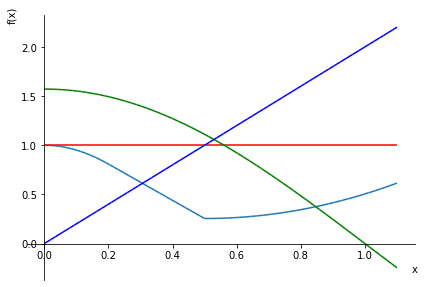

integration on (0, 1) :  0.515894661978713
rets :  0.5144646728260175 0.5163534896685466 0.5171818771462553
mis ret :  0.5160719164594366


In [76]:
from sympy import *
from sympy.functions import *
import numpy as np
from sympy.plotting import plot

# Construct a piecewise function to be the dest function
x, y, z = symbols('x y z')
f1 = cos(x * pi)
slope = diff(f1).subs(x, 0.2).evalf()
f2 = slope * (x - 0.2) + f1.subs(x, 0.2)
f3 = (x - 0.5) ** 2 + f2.subs(x, 0.5)
f4 = Piecewise((0, x < 0), (f1, x < 0.2), (f2, x < 0.5), (f3, True))

integrated_f4 = integrate(f4)

# Also prepare 3 pdfs for the MC integration, individually and with MIS
pdf1 = 1
pdf2 = cos(x * 0.5 * pi) * pi / 2
pdf3 = x * 2

p0 = plot(f4, (x, 0, 1.1), show=False)
p1 = plot(pdf1, (x, 0, 1.1), line_color='red', show=False)
p2 = plot(pdf2, (x, 0, 1.1), line_color='green', show=False)
p3 = plot(pdf3, (x, 0, 1.1), line_color='blue', show=False)
p0.extend(p1)
p0.extend(p2)
p0.extend(p3)
p0.show()

cdf1 = x
cdf2 = integrate(pdf2)
cdf3 = integrate(pdf3)

cdf1_inv = y
cdf2_inv = solve(cdf2 - y, x)[0]
cdf3_inv = solve(cdf3 - y, x)[1]
func1 = lambdify(y, cdf1_inv, 'numpy')
func2 = lambdify(y, cdf2_inv, 'numpy')
func3 = lambdify(y, cdf3_inv, 'numpy')

# MC integration individually
sample_cnt = 90000
uniform_samples = np.random.uniform(0, 1, sample_cnt)
samples1 = func1(uniform_samples)
samples2 = func2(uniform_samples)
samples3 = func3(uniform_samples)

est_func1 = lambdify(x, f4 / pdf1, 'numpy')
est_func2 = lambdify(x, f4 / pdf2, 'numpy')
est_func3 = lambdify(x, f4 / pdf3, 'numpy')

ret1 = np.average(est_func1(samples1))
ret2 = np.average(est_func2(samples2))
ret3 = np.average(est_func3(samples3))

print('integration on (0, 1) : ', integrated_f4.subs(x, 1).evalf())
print('rets : ', ret1, ret2, ret3)

# MIS
mis_sp_cnt = sample_cnt // 3
mis_uni_samples = np.random.uniform(0, 1, mis_sp_cnt)
mis_samples1 = func1(mis_uni_samples)
mis_samples2 = func2(mis_uni_samples)
mis_samples3 = func3(mis_uni_samples)
omega_denom = pdf1 * mis_sp_cnt + pdf2 * mis_sp_cnt + pdf3 * mis_sp_cnt
omega1 = pdf1 * mis_sp_cnt / omega_denom
omega2 = pdf2 * mis_sp_cnt / omega_denom
omega3 = pdf3 * mis_sp_cnt / omega_denom

mis_est1 = lambdify(x, f4 / pdf1 * omega1)
mis_est2 = lambdify(x, f4 / pdf2 * omega2)
mis_est3 = lambdify(x, f4 / pdf3 * omega3)

mis_ret = np.sum(mis_est1(mis_samples1)) / mis_sp_cnt + np.sum(mis_est2(mis_samples2)) / mis_sp_cnt + \
    np.sum(mis_est3(mis_samples3)) / mis_sp_cnt

print('mis ret : ', mis_ret)